In [2]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Token
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams
from spacy.lang.en.stop_words import STOP_WORDS
from collections import defaultdict 
import nltk



objective : To produce insights 

In [3]:
#loading data
Data = pd.read_csv(r"D:\Downloads\Hotel Reviews- US.csv")
Data


,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


# Data Cleaning

In [164]:
#filling missing values
Data = Data.fillna("Unknown")
Data

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,Unknown
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [165]:
Data.head(10)

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,Unknown
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
5,All the options for fun were great! Do wish th...,2019/08/19,Unknown
6,Old. Musty. Motel. \n Bath need an update asap...,2019/08/19,Unknown
7,Loved the layout of the hotel and the relaxing...,2019/08/19,Unknown
8,My wife and I loved everything about it. It’s ...,2019/08/19,Unknown
9,"rooms were very small, was told i had a compli...",2019/08/19,Unknown


In [166]:
#converting data to datetime
Data['date'] = Data['date'].astype('datetime64[ns]')

In [167]:
Data.dtypes

Review              object
date        datetime64[ns]
Location            object
dtype: object

In [168]:
Data.shape

(6448, 3)

In [216]:
print(Data['Location'].unique())

['Sebastian' 'Los Angeles' 'Georgia' ... 'India' 'Malaysia'
 'Trinidad and Tobago']


In [169]:
text =str(Data['Review']) 
text

"0       I was very impressed with the resort.\\n Great ...\n1       The rooms were nice the outside needs work als...\n2       Great location! I have stayed at this hotel on...\n3       The hotel was adequate for my stay. The strips...\n4       Great location, room was large and spacious. P...\n                              ...                        \n6443    ·the staff were all so friendly. frank, the ch...\n6444           ·the internet barely worked or didn't work\n6445    ·the location was great.\\n \\n \\n \\n \\n ·the be...\n6446    ·we were early for check in and the staff was ...\n6447    ·staff, free coffee, location and activities.\\...\nName: Review, Length: 6448, dtype: object"

In [170]:
#Remove URL
import re
re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", str(Data['Review']))


"0       I was very impressed with the resort.\\n Great ...\n1       The rooms were nice the outside needs work als...\n2       Great location! I have stayed at this hotel on...\n3       The hotel was adequate for my stay. The strips...\n4       Great location, room was large and spacious. P...\n                              ...                        \n6443    ·the staff were all so friendly. frank, the ch...\n6444           ·the internet barely worked or didn't work\n6445    ·the location was great.\\n \\n \\n \\n \\n ·the be...\n6446    ·we were early for check in and the staff was ...\n6447    ·staff, free coffee, location and activities.\\...\nName: Review, Length: 6448, dtype: object"

In [171]:
# converting to lower case then removed Punctuations, Numbers, Special Characters and finally remove duplicated spaces 
# return a list of characters

Data['Review'] = Data['Review'].str.replace("[^a-zA-Z]", " ").str.replace("\s+", " ").str.lower()

Data

C:\Users\POORNIMA\AppData\Local\Temp\ipykernel_10164\2355223701.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['Review'] = Data['Review'].str.replace("[^a-zA-Z]", " ").str.replace("\s+", " ").str.lower()


,Review,date,Location
0,i was very impressed with the resort great sta...,2019-08-20,Sebastian
1,the rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,great location i have stayed at this hotel on ...,2019-08-20,Georgia
3,the hotel was adequate for my stay the strips ...,2019-08-20,Unknown
4,great location room was large and spacious par...,2019-08-19,Palm Harbor
...,...,...,...
6443,the staff were all so friendly frank the chef...,2019-07-12,United States of America
6444,the internet barely worked or didn t work,2019-07-12,United States of America
6445,the location was great the bed was the most u...,2019-07-10,United States of America
6446,we were early for check in and the staff was ...,2019-07-10,United States of America


In [172]:
# removing words less than 3
Data['Review'] = Data['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
Data

,Review,date,Location
0,very impressed with resort great staff main re...,2019-08-20,Sebastian
1,rooms were nice outside needs work also free b...,2019-08-20,Los Angeles
2,great location have stayed this hotel last thr...,2019-08-20,Georgia
3,hotel adequate stay strips bathtub were useles...,2019-08-20,Unknown
4,great location room large spacious parking eas...,2019-08-19,Palm Harbor
...,...,...,...
6443,staff were friendly frank chef buffet over mee...,2019-07-12,United States of America
6444,internet barely worked didn work,2019-07-12,United States of America
6445,location great most uncomfortable have ever been,2019-07-10,United States of America
6446,were early check staff very accommodating were...,2019-07-10,United States of America


In [173]:
Data.dtypes

Review              object
date        datetime64[ns]
Location            object
dtype: object

# Insight 1 - Number of reviews per month

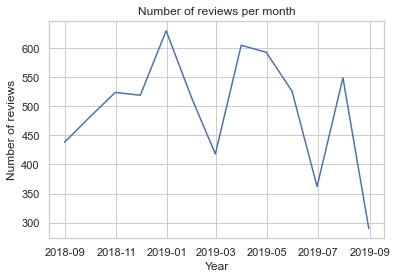

In [497]:
import matplotlib.pyplot as plt
Data = Data.set_index('date')
plt.plot(Data['Review'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

The reviews were from 2018–08–01 to 2019–08–20 and it was for more than one years. The number of reviews per month were 
increasing in 2019 peaked in januvary and it could mean that people were travelling and hotels were popular stay in the 
past decade, before covid.The reviews dropped down drastically in the month of october, before beginning of covid. 





# Insight 2 : Popular and less popular locations (Cities) for hotel stay 


In [214]:
#flitering unkown string  
new_Data = Data[Data["Location"].str.contains("Unknown")==False]

In [187]:
new_Data.head(5)

,Review,date,Location
0,very impressed with resort great staff main re...,2019-08-20,Sebastian
1,rooms were nice outside needs work also free b...,2019-08-20,Los Angeles
2,great location have stayed this hotel last thr...,2019-08-20,Georgia
4,great location room large spacious parking eas...,2019-08-19,Palm Harbor
10,very clean friendly love location restaurant t...,2019-08-19,California


In [188]:
Location_count = new_Data['Location'].value_counts()

In [189]:
#TOP 10 Popular Cities for hotel stay
Location_count.head(10) 

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
Florida                      16
United Kingdom               14
New York, NY                 13
Miami                        12
Orlando                      12
Name: Location, dtype: int64

In [190]:
#less popular cities for hotel stay
Location_count.tail(10)

Paris                  1
Lake alfred, us        1
Reno, Nevada           1
Mukilteo, WA           1
Spokane WA             1
Halifax, N.S.          1
State College, PA      1
Los ángeles , us       1
Stroudsburg Pa US      1
Trinidad and Tobago    1
Name: Location, dtype: int64

<AxesSubplot:>

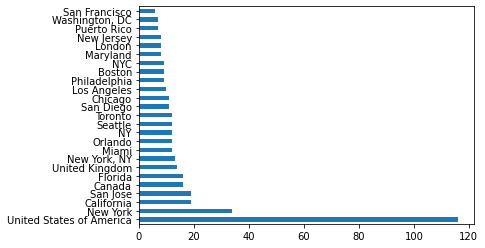

In [191]:
new_Data['Location'].value_counts()[:25].plot(kind='barh')

C:\Users\POORNIMA\Desktop\propy\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


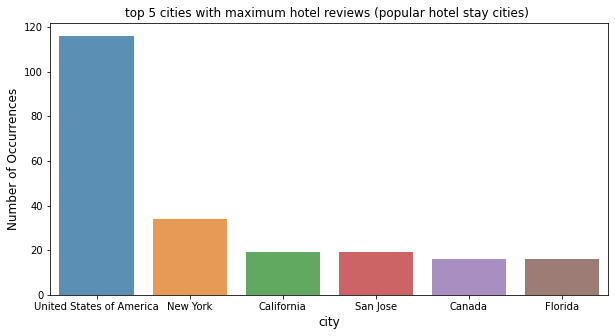

In [192]:
#ploting
import matplotlib.pyplot as plt
Location_count  = new_Data['Location'].value_counts()
Location_count = Location_count[:6,]
plt.figure(figsize=(10,5))
sns.barplot(Location_count.index,Location_count.values, alpha=0.8)
plt.title('top 5 cities with maximum hotel reviews (popular hotel stay cities) ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

This shows that New york, California, San Jose, Canada, Florida are the popular cities among people for staying in hotels and these cities have the highest records of maintaning custmor feedbacks. This also shows that tourist attraction is more popular in these cities comparing to others. 

In [193]:
Location_count.head

<bound method NDFrame.head of United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
Florida                      16
Name: Location, dtype: int64>

# Tokenize, Remove Stop Words and Lemmatization


In [23]:
# adding hotel to Stopwords
nlp.vocab["hotel"].is_stop = True
nlp.vocab["hotel"].is_stop 

True

In [24]:
# it takes time becuase it returns meninfull words
def remove_stop(doc_tokens):
    
     return [token.lemma_ for token in doc_tokens if not token.is_stop]

In [25]:
Data['Review_tokenize'] = Data['Review'].apply(lambda x: remove_stop(nlp(x)))

Data

,Review,date,Location,Review_tokenize
0,very impressed with resort great staff main re...,2019-08-20,Sebastian,"[impressed, resort, great, staff, main, resort..."
1,rooms were nice outside needs work also free b...,2019-08-20,Los Angeles,"[room, nice, outside, need, work, free, breakf..."
2,great location have stayed this hotel last thr...,2019-08-20,Georgia,"[great, location, stay, trip, york, read, read]"
3,hotel adequate stay strips bathtub were useles...,2019-08-20,Unknown,"[adequate, stay, strip, bathtub, useless, fall..."
4,great location room large spacious parking eas...,2019-08-19,Palm Harbor,"[great, location, room, large, spacious, parki..."
...,...,...,...,...
6443,staff were friendly frank chef buffet over mee...,2019-07-12,United States of America,"[staff, friendly, frank, chef, buffet, meeting..."
6444,internet barely worked didn work,2019-07-12,United States of America,"[internet, barely, work, didn, work]"
6445,location great most uncomfortable have ever been,2019-07-10,United States of America,"[location, great, uncomfortable]"
6446,were early check staff very accommodating were...,2019-07-10,United States of America,"[early, check, staff, accommodating, able, che..."


In [27]:
Data['Review_tokenize_join'] = Data['Review_tokenize'].apply(lambda x: ' '.join(x))

Data.head()

,Review,date,Location,Review_tokenize,Review_tokenize_join
0,very impressed with resort great staff main re...,2019-08-20,Sebastian,"[impressed, resort, great, staff, main, resort...",impressed resort great staff main resort pool ...
1,rooms were nice outside needs work also free b...,2019-08-20,Los Angeles,"[room, nice, outside, need, work, free, breakf...",room nice outside need work free breakfast nic...
2,great location have stayed this hotel last thr...,2019-08-20,Georgia,"[great, location, stay, trip, york, read, read]",great location stay trip york read read
3,hotel adequate stay strips bathtub were useles...,2019-08-20,Unknown,"[adequate, stay, strip, bathtub, useless, fall...",adequate stay strip bathtub useless fall take ...
4,great location room large spacious parking eas...,2019-08-19,Palm Harbor,"[great, location, room, large, spacious, parki...",great location room large spacious parking eas...


# Insight 3 : Frequency of the words in Reviews to find Positive and Negative review

In [28]:
def counter(st_):
    dic = {}
    all_words = ' '.join([text for text in st_])
    all_words = all_words.split()
    for i in all_words:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] +=1
    return dic
#     return sorted(dic, key=lambda x: x[0]) 
#     return {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

   

In [29]:
count_dict = {word :count  for word, count in counter(Data['Review_tokenize_join']).items()}

In [30]:
Data_freque = pd.DataFrame(count_dict.items(), columns=['word', 'count'])
Data_freque.sort_values(['count'], inplace = True , ascending = False)
Data_freque.head()
Data_count_word = Data_freque.iloc[:20]


In [31]:
Data_count_word.head(20)

,word,count
11,read,10649
12,room,4629
20,stay,2019
3,staff,1818
2,great,1642
7,clean,1536
9,location,1395
13,nice,1284
42,good,1093
402,check,1008


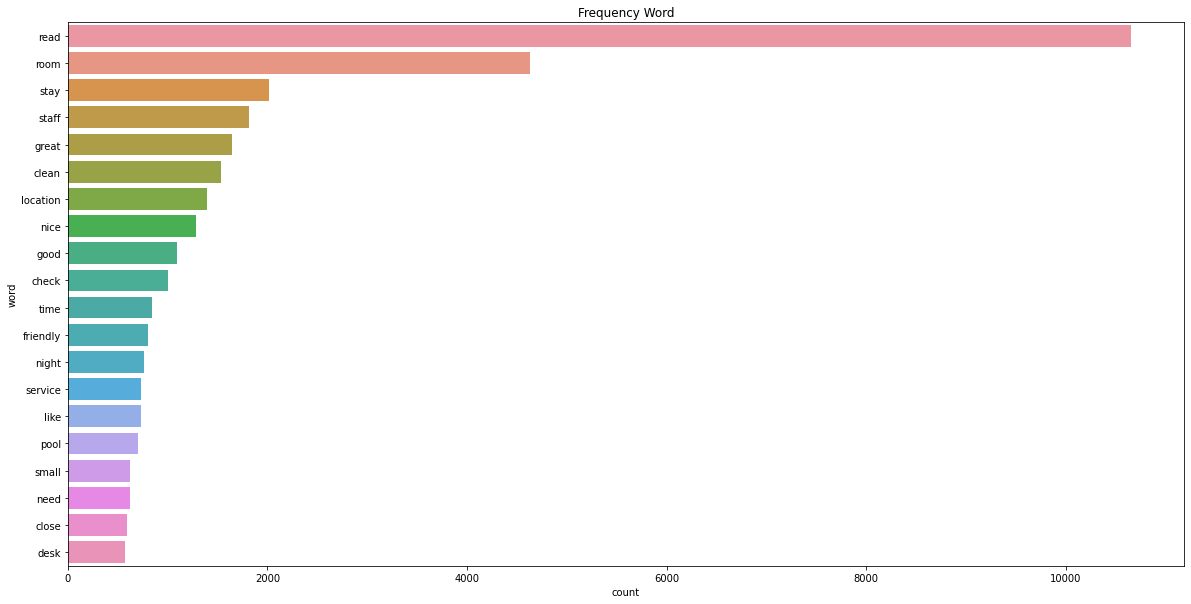

In [32]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="count", y="word", data=Data_count_word)
ax.set(title = 'Frequency Word')
plt.show()

# Insight - 4 Wordcloud

In [119]:
#bag of words
def show_wordcloud(Data, title = None): 
    wordcloud = WordCloud( collocations=False,
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=50, 
        scale=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(Data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

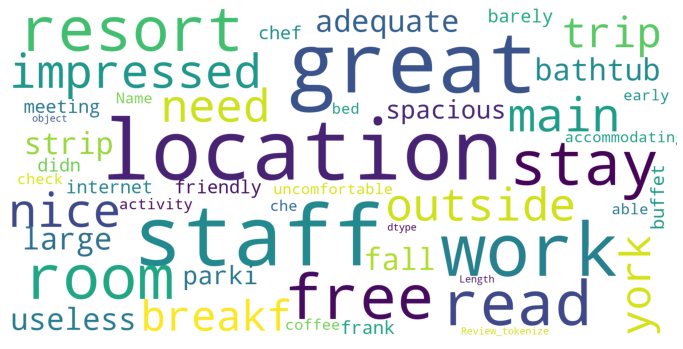

In [34]:
show_wordcloud(Data['Review_tokenize'])

 We can see that most of the words are indeed related to the hotels: room, staff, bathtub, etc. Some words are more related to the customer experience with the hotel stay: impressed,great,adequate,nice, etc. which are some other words that were mentioned by lots of customers.

In [35]:
#understanding the connection bewteen words
text = str(Data['Review'])

word1 = "room"
word2 = "spacious"

start = text.find(word1)
end = text.find(word2)

if start != -1 and end != -1 and start < end:
    print(text[start + len(word1):end])

s were nice outside needs work also free b...
2       great location have stayed this hotel last thr...
3       hotel adequate stay strips bathtub were useles...
4       great location room large 


# Insight - 5 analysing the most popular city  and sentiment analysis

In [142]:
import pandas as pd

contain_values = Data[Data['Location'].str.contains('New York')]
contain_values

,Review,date,Location,Review_tokenize,Review_tokenize_join
103,need more staff wait while family stood very u...,2019-08-09,New York,"[need, staff, wait, family, stand, underwhelmi...",need staff wait family stand underwhelming tak...
148,didn like having trouble checking also tgat wa...,2019-08-05,New York,"[didn, like, have, trouble, check, tgat, wasn,...",didn like have trouble check tgat wasn work ch...
213,property needs renovated very fashion read mor...,2019-07-31,"New York, NY","[property, need, renovate, fashion, read, read]",property need renovate fashion read read
443,hotel very nice clean staff professional extre...,2019-07-09,New York,"[nice, clean, staff, professional, extremely, ...",nice clean staff professional extremely nice f...
461,overall very nice resort this trip surprise da...,2019-07-08,New York,"[overall, nice, resort, trip, surprise, daught...",overall nice resort trip surprise daughter bir...
518,main thing that enjoyed staff they were excell...,2019-07-04,"New York, New York","[main, thing, enjoy, staff, excellent, stacey,...",main thing enjoy staff excellent stacey jose a...
1222,nothing wrong with property itself very luxuri...,2019-04-29,New York,"[wrong, property, luxurious, keep, cleanliness...",wrong property luxurious keep cleanliness plus...
1368,great customer service very welcoming willing ...,2019-04-21,"New York, ny","[great, customer, service, welcome, willing, h...",great customer service welcome willing help re...
1512,great resort pool close lots restaurants read ...,2019-04-14,New York,"[great, resort, pool, close, lot, restaurant, ...",great resort pool close lot restaurant read read
1523,like because location amenities shuttles from ...,2019-04-13,New York,"[like, location, amenity, shuttle, park, tranq...",like location amenity shuttle park tranquility...


In [143]:
def show_wordcloud(contain_values, title = None): 
    wordcloud = WordCloud( collocations=False,
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=50, 
        scale=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(contain_values))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

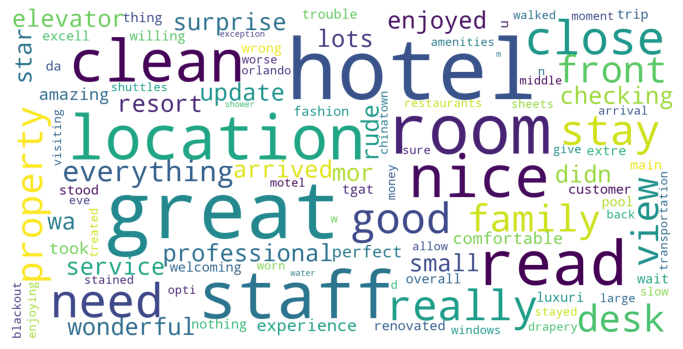

In [144]:
show_wordcloud(contain_values['Review'])

Most popular words used by customers in New york is Clean,great,room,nice,staff,enjoyed which are related to customers experience 

In [145]:
 import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\POORNIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#polarity and subjectivity

Polarity determines whether the review is positive or negative and it is float which lies in the range of [-1,1] where 1 
means positive statement and -1 means a negative statement whereas subjectivity tells us if the public opinion is personal 
opinion,emotion and judegement whereas objective refers to factual information. Subjectivity is also a float which lies in 
the range of [0,1].

In [146]:

text = str(contain_values['Review_tokenize_join'])


In [194]:
#finding polarity and subjectivity
def sentiment_func(Review):
    try:
        return TextBlob(Review).sentiment
    except:
        return None

In [195]:
contain_values['pol_sub'] = contain_values['Review'].apply(sentiment_func)

C:\Users\POORNIMA\AppData\Local\Temp\ipykernel_10164\4228652446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contain_values['pol_sub'] = contain_values['Review'].apply(sentiment_func)


In [196]:
contain_values

,Review,date,Location,Review_tokenize,Review_tokenize_join,pol_sub
103,need more staff wait while family stood very u...,2019-08-09,New York,"[need, staff, wait, family, stand, underwhelmi...",need staff wait family stand underwhelming tak...,"(0.19666666666666666, 0.3533333333333334)"
148,didn like having trouble checking also tgat wa...,2019-08-05,New York,"[didn, like, have, trouble, check, tgat, wasn,...",didn like have trouble check tgat wasn work ch...,"(0.08333333333333334, 0.31666666666666665)"
213,property needs renovated very fashion read mor...,2019-07-31,"New York, NY","[property, need, renovate, fashion, read, read]",property need renovate fashion read read,"(0.17777777777777778, 0.2888888888888889)"
443,hotel very nice clean staff professional extre...,2019-07-09,New York,"[nice, clean, staff, professional, extremely, ...",nice clean staff professional extremely nice f...,"(0.31142857142857144, 0.5523809523809524)"
461,overall very nice resort this trip surprise da...,2019-07-08,New York,"[overall, nice, resort, trip, surprise, daught...",overall nice resort trip surprise daughter bir...,"(0.19415238095238097, 0.47319047619047616)"
518,main thing that enjoyed staff they were excell...,2019-07-04,"New York, New York","[main, thing, enjoy, staff, excellent, stacey,...",main thing enjoy staff excellent stacey jose a...,"(0.3678571428571428, 0.4857142857142857)"
1222,nothing wrong with property itself very luxuri...,2019-04-29,New York,"[wrong, property, luxurious, keep, cleanliness...",wrong property luxurious keep cleanliness plus...,"(0.06113756613756613, 0.4538536155202821)"
1368,great customer service very welcoming willing ...,2019-04-21,"New York, ny","[great, customer, service, welcome, willing, h...",great customer service welcome willing help re...,"(0.31666666666666665, 0.47333333333333333)"
1512,great resort pool close lots restaurants read ...,2019-04-14,New York,"[great, resort, pool, close, lot, restaurant, ...",great resort pool close lot restaurant read read,"(0.37777777777777777, 0.4388888888888889)"
1523,like because location amenities shuttles from ...,2019-04-13,New York,"[like, location, amenity, shuttle, park, tranq...",like location amenity shuttle park tranquility...,"(0.16666666666666669, 0.2833333333333333)"


In [197]:
contain_values['pol_sub']:[0][0]
contain_values['Polarity'] = contain_values['pol_sub'].apply(lambda x: x[0])
contain_values['Subjectivity'] = contain_values['pol_sub'].apply(lambda x: x[1])

C:\Users\POORNIMA\AppData\Local\Temp\ipykernel_10164\3997412730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contain_values['Polarity'] = contain_values['pol_sub'].apply(lambda x: x[0])
C:\Users\POORNIMA\AppData\Local\Temp\ipykernel_10164\3997412730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contain_values['Subjectivity'] = contain_values['pol_sub'].apply(lambda x: x[1])


In [198]:
contain_values

,Review,date,Location,Review_tokenize,Review_tokenize_join,pol_sub,Polarity,Subjectivity
103,need more staff wait while family stood very u...,2019-08-09,New York,"[need, staff, wait, family, stand, underwhelmi...",need staff wait family stand underwhelming tak...,"(0.19666666666666666, 0.3533333333333334)",1.966667e-01,0.353333
148,didn like having trouble checking also tgat wa...,2019-08-05,New York,"[didn, like, have, trouble, check, tgat, wasn,...",didn like have trouble check tgat wasn work ch...,"(0.08333333333333334, 0.31666666666666665)",8.333333e-02,0.316667
213,property needs renovated very fashion read mor...,2019-07-31,"New York, NY","[property, need, renovate, fashion, read, read]",property need renovate fashion read read,"(0.17777777777777778, 0.2888888888888889)",1.777778e-01,0.288889
443,hotel very nice clean staff professional extre...,2019-07-09,New York,"[nice, clean, staff, professional, extremely, ...",nice clean staff professional extremely nice f...,"(0.31142857142857144, 0.5523809523809524)",3.114286e-01,0.552381
461,overall very nice resort this trip surprise da...,2019-07-08,New York,"[overall, nice, resort, trip, surprise, daught...",overall nice resort trip surprise daughter bir...,"(0.19415238095238097, 0.47319047619047616)",1.941524e-01,0.473190
518,main thing that enjoyed staff they were excell...,2019-07-04,"New York, New York","[main, thing, enjoy, staff, excellent, stacey,...",main thing enjoy staff excellent stacey jose a...,"(0.3678571428571428, 0.4857142857142857)",3.678571e-01,0.485714
1222,nothing wrong with property itself very luxuri...,2019-04-29,New York,"[wrong, property, luxurious, keep, cleanliness...",wrong property luxurious keep cleanliness plus...,"(0.06113756613756613, 0.4538536155202821)",6.113757e-02,0.453854
1368,great customer service very welcoming willing ...,2019-04-21,"New York, ny","[great, customer, service, welcome, willing, h...",great customer service welcome willing help re...,"(0.31666666666666665, 0.47333333333333333)",3.166667e-01,0.473333
1512,great resort pool close lots restaurants read ...,2019-04-14,New York,"[great, resort, pool, close, lot, restaurant, ...",great resort pool close lot restaurant read read,"(0.37777777777777777, 0.4388888888888889)",3.777778e-01,0.438889
1523,like because location amenities shuttles from ...,2019-04-13,New York,"[like, location, amenity, shuttle, park, tranq...",like location amenity shuttle park tranquility...,"(0.16666666666666669, 0.2833333333333333)",1.666667e-01,0.283333


In [201]:
contain_values['positive'] = contain_values['Polarity'].apply(lambda x: 1 if x >= 0 else 0)

C:\Users\POORNIMA\AppData\Local\Temp\ipykernel_10164\1431346191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contain_values['positive'] = contain_values['Polarity'].apply(lambda x: 1 if x >= 0 else 0)


In [202]:
contain_values

,Review,date,Location,Review_tokenize,Review_tokenize_join,pol_sub,Polarity,Subjectivity,positive
103,need more staff wait while family stood very u...,2019-08-09,New York,"[need, staff, wait, family, stand, underwhelmi...",need staff wait family stand underwhelming tak...,"(0.19666666666666666, 0.3533333333333334)",1.966667e-01,0.353333,1
148,didn like having trouble checking also tgat wa...,2019-08-05,New York,"[didn, like, have, trouble, check, tgat, wasn,...",didn like have trouble check tgat wasn work ch...,"(0.08333333333333334, 0.31666666666666665)",8.333333e-02,0.316667,1
213,property needs renovated very fashion read mor...,2019-07-31,"New York, NY","[property, need, renovate, fashion, read, read]",property need renovate fashion read read,"(0.17777777777777778, 0.2888888888888889)",1.777778e-01,0.288889,1
443,hotel very nice clean staff professional extre...,2019-07-09,New York,"[nice, clean, staff, professional, extremely, ...",nice clean staff professional extremely nice f...,"(0.31142857142857144, 0.5523809523809524)",3.114286e-01,0.552381,1
461,overall very nice resort this trip surprise da...,2019-07-08,New York,"[overall, nice, resort, trip, surprise, daught...",overall nice resort trip surprise daughter bir...,"(0.19415238095238097, 0.47319047619047616)",1.941524e-01,0.473190,1
518,main thing that enjoyed staff they were excell...,2019-07-04,"New York, New York","[main, thing, enjoy, staff, excellent, stacey,...",main thing enjoy staff excellent stacey jose a...,"(0.3678571428571428, 0.4857142857142857)",3.678571e-01,0.485714,1
1222,nothing wrong with property itself very luxuri...,2019-04-29,New York,"[wrong, property, luxurious, keep, cleanliness...",wrong property luxurious keep cleanliness plus...,"(0.06113756613756613, 0.4538536155202821)",6.113757e-02,0.453854,1
1368,great customer service very welcoming willing ...,2019-04-21,"New York, ny","[great, customer, service, welcome, willing, h...",great customer service welcome willing help re...,"(0.31666666666666665, 0.47333333333333333)",3.166667e-01,0.473333,1
1512,great resort pool close lots restaurants read ...,2019-04-14,New York,"[great, resort, pool, close, lot, restaurant, ...",great resort pool close lot restaurant read read,"(0.37777777777777777, 0.4388888888888889)",3.777778e-01,0.438889,1
1523,like because location amenities shuttles from ...,2019-04-13,New York,"[like, location, amenity, shuttle, park, tranq...",like location amenity shuttle park tranquility...,"(0.16666666666666669, 0.2833333333333333)",1.666667e-01,0.283333,1


In [203]:
contain_values['negative'] = contain_values['Polarity'].apply(lambda x: 1 if x <= 0 else 0)

C:\Users\POORNIMA\AppData\Local\Temp\ipykernel_10164\2238036768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contain_values['negative'] = contain_values['Polarity'].apply(lambda x: 1 if x <= 0 else 0)


In [204]:
contain_values


,Review,date,Location,Review_tokenize,Review_tokenize_join,pol_sub,Polarity,Subjectivity,positive,negative
103,need more staff wait while family stood very u...,2019-08-09,New York,"[need, staff, wait, family, stand, underwhelmi...",need staff wait family stand underwhelming tak...,"(0.19666666666666666, 0.3533333333333334)",1.966667e-01,0.353333,1,0
148,didn like having trouble checking also tgat wa...,2019-08-05,New York,"[didn, like, have, trouble, check, tgat, wasn,...",didn like have trouble check tgat wasn work ch...,"(0.08333333333333334, 0.31666666666666665)",8.333333e-02,0.316667,1,0
213,property needs renovated very fashion read mor...,2019-07-31,"New York, NY","[property, need, renovate, fashion, read, read]",property need renovate fashion read read,"(0.17777777777777778, 0.2888888888888889)",1.777778e-01,0.288889,1,0
443,hotel very nice clean staff professional extre...,2019-07-09,New York,"[nice, clean, staff, professional, extremely, ...",nice clean staff professional extremely nice f...,"(0.31142857142857144, 0.5523809523809524)",3.114286e-01,0.552381,1,0
461,overall very nice resort this trip surprise da...,2019-07-08,New York,"[overall, nice, resort, trip, surprise, daught...",overall nice resort trip surprise daughter bir...,"(0.19415238095238097, 0.47319047619047616)",1.941524e-01,0.473190,1,0
518,main thing that enjoyed staff they were excell...,2019-07-04,"New York, New York","[main, thing, enjoy, staff, excellent, stacey,...",main thing enjoy staff excellent stacey jose a...,"(0.3678571428571428, 0.4857142857142857)",3.678571e-01,0.485714,1,0
1222,nothing wrong with property itself very luxuri...,2019-04-29,New York,"[wrong, property, luxurious, keep, cleanliness...",wrong property luxurious keep cleanliness plus...,"(0.06113756613756613, 0.4538536155202821)",6.113757e-02,0.453854,1,0
1368,great customer service very welcoming willing ...,2019-04-21,"New York, ny","[great, customer, service, welcome, willing, h...",great customer service welcome willing help re...,"(0.31666666666666665, 0.47333333333333333)",3.166667e-01,0.473333,1,0
1512,great resort pool close lots restaurants read ...,2019-04-14,New York,"[great, resort, pool, close, lot, restaurant, ...",great resort pool close lot restaurant read read,"(0.37777777777777777, 0.4388888888888889)",3.777778e-01,0.438889,1,0
1523,like because location amenities shuttles from ...,2019-04-13,New York,"[like, location, amenity, shuttle, park, tranq...",like location amenity shuttle park tranquility...,"(0.16666666666666669, 0.2833333333333333)",1.666667e-01,0.283333,1,0


In [211]:
#counting postive reviews in new york
positive_count = contain_values['positive'].value_counts()
positive_count

1    51
0     7
Name: positive, dtype: int64

total positive count reviews is 51

In [210]:
#counting negative reviews in new york
negative_count = contain_values['negative'].value_counts()
negative_count 

0    51
1     7
Name: negative, dtype: int64

total negative count reviews is 7

# Conclusion

Insight 1 : The reviews were from 2018–08–01 to 2019–08–20 and it was for more than one years. The number of reviews per month were 
increasing in 2019 peaked in januvary and it could mean that people were travelling and hotels were popular stay in the 
past decade, before covid.The reviews dropped down drastically in the month of october, before beginning of covid. 
   
Insight 2 : I have determined the top 5 most Popular and less popular locations (Cities) for hotel stay. This shows that United States of America, New york, California, San Jose, Canada, Florida are the popular cities among people for staying in hotels and these cities have the highest records of maintaning custmor feedbacks. This also shows that tourist attraction is more popular in these cities compared to others. 
    
Insight 3 : Determined the Frequency of the words in Reviews and counted them. Indeed most people have used words that indicated 
their personal experience. Hence, I performed sentiment analysis.     
    
Insight 4 : We can see that most of the words are indeed related to the hotels: room, staff, bathtub, etc. Some words are more
related to the customer experience with the hotel stay: impressed,great,adequate,nice, etc. which are some other words that were
mentioned by lots of customers.

Insight 5 : I analysed the Most popular location New york among the people and found the Most popular words used by customers 
in New york are Clean,great,room,nice,staff,enjoyed which shows most of the words are postive and I found the polarity and subjectivity of the reviews. There are totally 57 positive reviews and 7 negative reviews, this also indicates that most positive reviews can attract more customers to stay in hotels. This also proves that hotels in New york are good and New york is good location to visit.     